# Analisis y Visualizacion de datos
El objetivo de este práctico es realizar una exploración del dataset provisto. Se busca conocer los datos con los que contamos y a través de la aplicación de los estadísticos y gráficos obtener un primer acercamiento,una idea global de la información.

## Install

In [ ]:
!wget https://raw.githubusercontent.com/SantiagoMerlo/Mentoria/master/diplo.csv

--2021-06-05 13:16:37--  https://raw.githubusercontent.com/SantiagoMerlo/Mentoria/master/diplo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40834787 (39M) [text/plain]
Saving to: ‘diplo.csv’

diplo.csv           100%[===================>]  38.94M  32.3MB/s    in 1.2s    

2021-06-05 13:16:41 (32.3 MB/s) - ‘diplo.csv’ saved [40834787/40834787]



## Imports

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
import warnings
import seaborn
seaborn.set_context('talk')

### Global Configs

In [ ]:
# Accion interactiva para ver mejor los plots
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxWidth: 10000vh})'''))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [ ]:
style.use("ggplot")
sns.set_context('talk')
warnings.filterwarnings("ignore", category=FutureWarning)
plt.rcParams['figure.figsize'] = (20,20)

<IPython.core.display.Javascript object>

# Desarrollo
## Exploracion de datos

In [ ]:
df = pd.read_csv("./diplo.csv")
df.shape

<IPython.core.display.Javascript object>

(73005, 29)

In [ ]:
df.describe()

<IPython.core.display.Javascript object>

,locationZip,attempts,position,page,stars,reviews,description,snippet
count,73005.000000,73005.0,73005.000000,73005.0,71172.000000,71172.000000,0.0,0.0
mean,14654.390247,1.0,9.449257,1.0,4.175780,372.209099,NaN,NaN
std,9398.702637,0.0,5.950160,0.0,0.483462,1132.339900,NaN,NaN
min,8001.000000,1.0,1.000000,1.0,1.000000,1.000000,NaN,NaN
25%,8014.000000,1.0,4.000000,1.0,3.900000,62.000000,NaN,NaN
50%,8034.000000,1.0,9.000000,1.0,4.200000,170.000000,NaN,NaN
75%,28010.000000,1.0,15.000000,1.0,4.500000,369.000000,NaN,NaN
max,29001.000000,1.0,20.000000,1.0,5.000000,77817.000000,NaN,NaN


In [ ]:
df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73005 entries, 0 to 73004
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   accountId         51015 non-null  object 
 1   accountName       51015 non-null  object 
 2   locationId        51015 non-null  object 
 3   locationName      51015 non-null  object 
 4   uid               73005 non-null  object 
 5   directory         73005 non-null  object 
 6   keyword           73005 non-null  object 
 7   processDate       73005 non-null  object 
 8   locationZip       73005 non-null  int64  
 9   locationCity      540 non-null    object 
 10  locationCountry   73005 non-null  object 
 11  locationState     540 non-null    object 
 12  device            73005 non-null  object 
 13  language          73005 non-null  object 
 14  status            73005 non-null  object 
 15  attempts          73005 non-null  int64  
 16  linkUrl           73005 non-null  object

In [ ]:
df.columns

<IPython.core.display.Javascript object>

Index(['accountId', 'accountName', 'locationId', 'locationName', 'uid',
       'directory', 'keyword', 'processDate', 'locationZip', 'locationCity',
       'locationCountry', 'locationState', 'device', 'language', 'status',
       'attempts', 'linkUrl', 'title', 'position', 'page', 'type',
       'addressPreview', 'telephonePreview', 'category', 'stars', 'reviews',
       'description', 'snippet', 'price'],
      dtype='object')

## Grafico dobre la correlación de los datos
### correlación de datos faltantes en 200 filas 


<IPython.core.display.Javascript object>

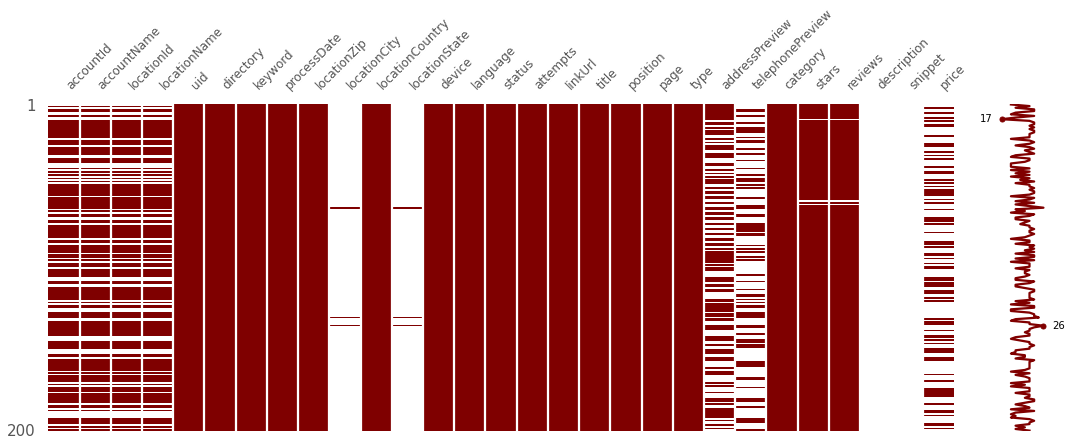

In [ ]:
msno.matrix(df.sample(200),figsize=(18, 6), fontsize=12, color=[0.5,0,0]) 

En este grafico podemos observar la relación entre los datos existentes y los datos faltantes. Se ve que existe una relación directa entre la ausencia de varios de ellos. 

## Actividad 1
#### Objetivo
Entender la naturaleza de los datos y analizar los parámetros que pueden afectar la **importancia** y **relevancia**

### 1.1
**¿Cuáles son las características de las palabras claves (“keyword”) que mejor fueron posicionadas?**

In [ ]:
print("Cantidad de Keywords: ",len(df["keyword"].unique()))
print("Cantidad de Posiciones: ",len(df["position"].unique()))

<IPython.core.display.Javascript object>

Cantidad de Keywords:  27
Cantidad de Posiciones:  20


In [ ]:
print("Palabras unicas: ", df["keyword"].unique())

<IPython.core.display.Javascript object>

Palabras unicas:  ['empanadas take away' 'empanadillas argentinas' 'empanadas argentinas'
 'empanadas gourmet' 'empanadas artesanales' 'empandas' 'empanadillas'
 'supermercado' 'supermercado online' 'supermercado cerca de mi'
 'supermercado a domicilio' 'supermercats' 'supermercat online'
 'supermecat barcelona' 'supermercados' 'supermercados cerca de mi'
 'supermercados a domicilio' 'tapas' 'restaurante' 'restaurante cerca'
 'cafeteria' 'bar' 'supermercado madrid' 'supermercados abiertos'
 'restaurantes abiertos' 'empanadas' 'empanadilla']


### hacemos una primera exploración sobre la distribución de las Keyword por la Position.

<IPython.core.display.Javascript object>

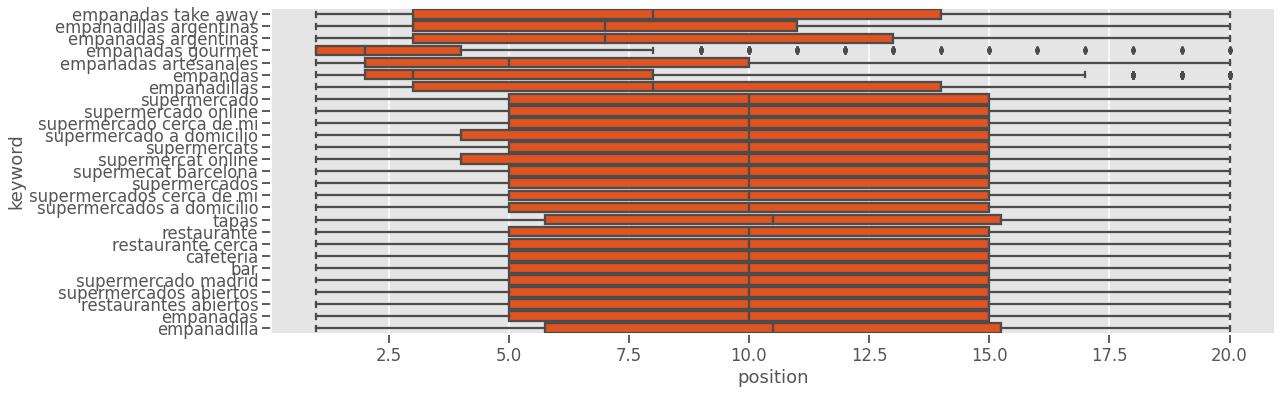

In [ ]:
plt.figure(figsize=(18, 6))
seaborn.boxplot(data=df, x=df.position, y=df.keyword,color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
temp = df[["keyword","position"]].copy()
temp = temp.groupby(["position","keyword"]).size().to_frame(name = 'count').reset_index()
temp

<IPython.core.display.Javascript object>

,position,keyword,count
0,1,bar,181
1,1,cafeteria,202
2,1,empanadas,212
3,1,empanadas argentinas,479
4,1,empanadas artesanales,477
...,...,...,...
535,20,supermercados abiertos,47
536,20,supermercados cerca de mi,95
537,20,supermercat online,96
538,20,supermercats,96


In [ ]:
print(temp.groupby("position")["keyword"].count())

<IPython.core.display.Javascript object>

position
1     27
2     27
3     27
4     27
5     27
6     27
7     27
8     27
9     27
10    27
11    27
12    27
13    27
14    27
15    27
16    27
17    27
18    27
19    27
20    27
Name: keyword, dtype: int64


En todas las posiciones, al menos en alguna vez se repite una de las Keyword

<IPython.core.display.Javascript object>

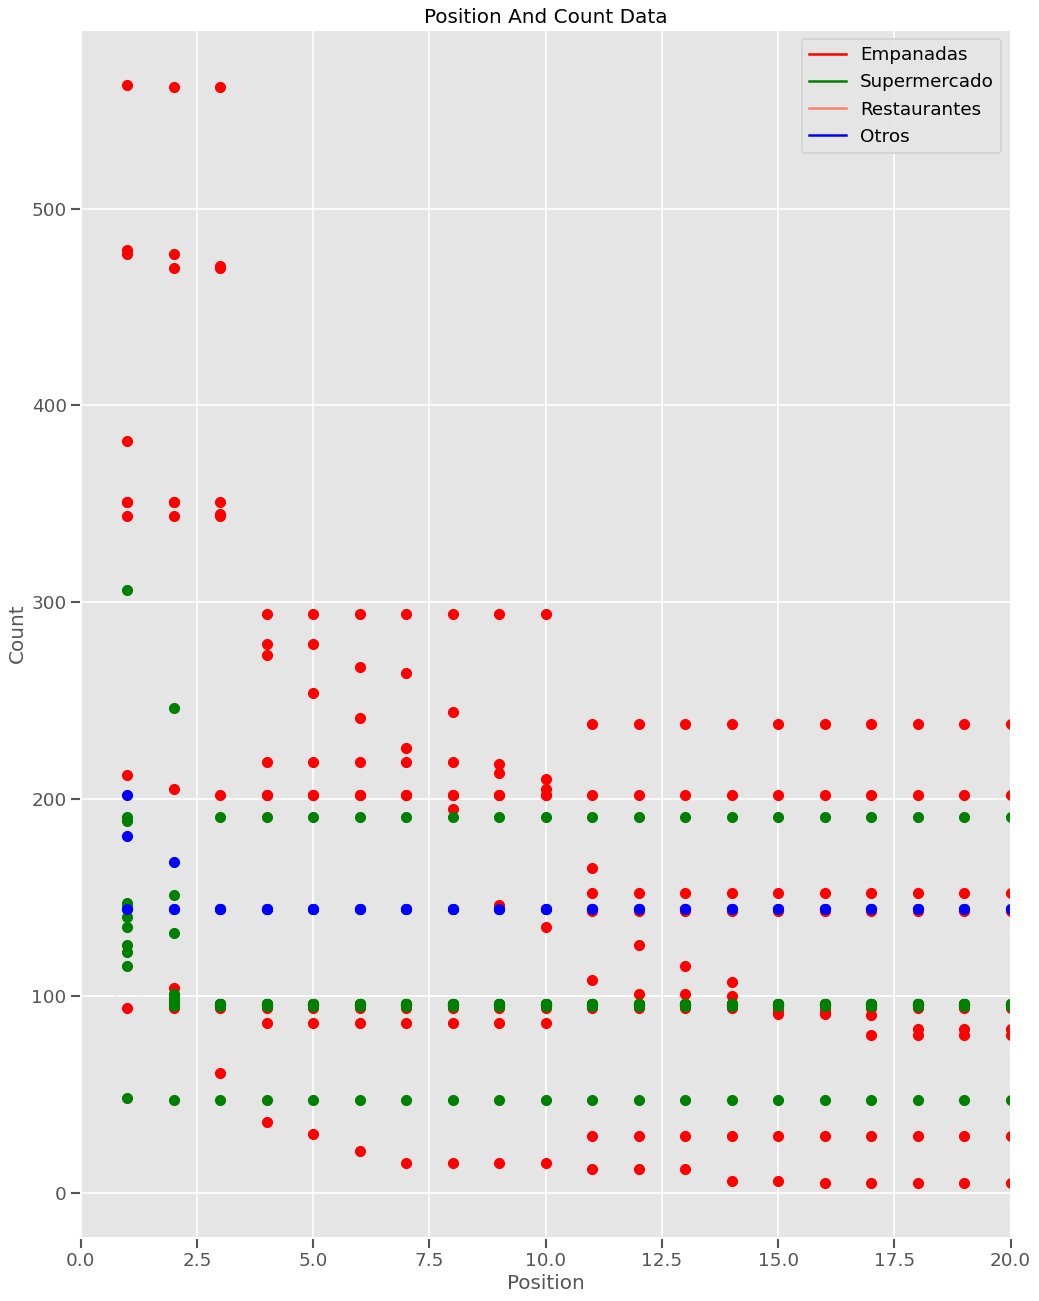

In [ ]:
import re
import matplotlib.lines as mlines
#temp_mask = (temp.position == 1)  | (temp.position == 5)  | (temp.position == 10) | (temp.position == 15) | (temp.position == 20)

plt.figure(figsize=(2, 1), dpi=80)
#ax = sns.lmplot('position', 'count', data=temp[temp_mask], fit_reg=False, size = 20, aspect =5 )

plt.title('Position And Count Data')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xlim(0,20)

#ax1 = plt.gca()
#for i, point in temp[temp_mask].iterrows():
for i, point in temp.iterrows():
    if re.match("empan", point['keyword']):
      c = "ro"
    elif re.match("super",point['keyword']):
      c = "go"
    elif re.match("rest",point['keyword']):
      c = "Salmon"
    else:
      c = "bo"
    plt.plot(point['position'], point['count'], c)

red_point = mlines.Line2D([], [], color='red', label='Empanadas')
green_point = mlines.Line2D([], [], color='green', label='Supermercado')
salmon_point = mlines.Line2D([], [], color='Salmon', label='Restaurantes')
blue_point = mlines.Line2D([], [], color='blue', label='Otros')

plt.legend(handles=[red_point, green_point, salmon_point, blue_point])

plt.gcf().set_size_inches(15,20)

Sin embargo, si vemos el anterior plot. Podemos apreciar como domina en casi todos lados la palabra `empanad...` domina como lo mejor posicionado. Ademas. El mejor posicionado y mayor veces es la keyword `empanadillas take away`

### 1.2
**¿Hay relación entre las tiendas (“title”/”client”/”accountId”,“accountName”/“locationId”, locationName”) mejor posicionadas y las características del nombre de la tienda?**

In [ ]:
# no se cual seria la columna client
cols = ["title","accountId","accountName","locationId", "locationName"]
temp = df[df.position == 1 ][cols]
print("Tamanio de elementos en la posicion 1", temp.shape)
temp_nan = temp.isna().sum()
print(temp_nan)

<IPython.core.display.Javascript object>

Tamanio de elementos en la posicion 1 (6187, 5)
title              0
accountId       2727
accountName     2727
locationId      2727
locationName    2727
dtype: int64


In [ ]:
print("El {:.2f}% de los datos son nulos".format(temp_nan[2]/temp.shape[0]))

<IPython.core.display.Javascript object>

El 0.44% de los datos son nulos


In [ ]:
temp = temp.dropna()
temp.sample(5)

<IPython.core.display.Javascript object>

,title,accountId,accountName,locationId,locationName
26863,Ametller Origen,accounts/111132227739978876098,NaN Group,accounts/111132227739978876098/locations/14042...,SearchMAS
18183,EROSKI city,accounts/111132227739978876098,NaN Group,accounts/111132227739978876098/locations/14042...,SearchMAS
35809,Restaurant Mistral,accounts/111132227739978876098,NaN Group,accounts/111132227739978876098/locations/14042...,SearchMAS
68248,L' Empanadité (Empanadas Gourmet),103758884914323736344,Marketing Muns,accounts/103758884914323736344/locations/54777...,Mucci
12484,Ahorramas,accounts/111132227739978876098,NaN Group,accounts/111132227739978876098/locations/14042...,SearchMAS


In [ ]:
print("De los {0} datos que tenemos".format(temp.shape[0]))
for c in cols:
  print("La columnas '{0}' tiene {1} valores unicos".format(c,len(temp[c].unique())))

<IPython.core.display.Javascript object>

De los 3460 datos que tenemos
La columnas 'title' tiene 746 valores unicos
La columnas 'accountId' tiene 2 valores unicos
La columnas 'accountName' tiene 2 valores unicos
La columnas 'locationId' tiene 20 valores unicos
La columnas 'locationName' tiene 25 valores unicos


### 1.3
**Hay relación entre las características de las palabras claves (“keyword”) mejor posicionadas y las tiendas (“title”/”client”/”accountId”,“accountName”/“locationId”,locationName”) mejor posicionadas?**

In [ ]:
cols = ["keyword", "title","accountId","accountName","locationId", "locationName"]
df[cols].isna().sum()

<IPython.core.display.Javascript object>

keyword             0
title               0
accountId       21990
accountName     21990
locationId      21990
locationName    21990
dtype: int64

Realmente al tener todas las variables nulas no encontramos mucha relacion. Por lo que lo mas conveniente seria eliminarlas.

No se encuentra una relación entre las características de las palabras claves, ya que muchas de ellas están nulas. Desconocemos si es por faltas de información o por error algún error al momento de extracción del dataset.


 # Conclusión 1

 En primera instancia para realizar un análisis exploratorio del dataset asignado, realizamos un grafico relacional de una muestra aleatoria de los datos . Esto nos provee, a priori, la certeza de que tenemos datos null , datos faltantes y un relación directa entre la ausencia de varios de ellos.
 
 Intentando entender la importancia y la relevancia de los datos, damos paso al procesamiento de los mismos y la construcción de tablas y plot de relación. Aquí es cuando llegamos a una inferencia destacable, pero impregnada en gran medida de intuición. Gran cantidad de keyword  que comienza con “empanad…” son las que aparecen mayoritariamente mejor posicionadas en la columna position. Podemos mencionar como un ejemplo dentro de la columna keyword a  “empandillas take away”.


## Actividad 2
#### Objetivo
Entender la distribución de rankings de los resultados de búsquedas locales por código postal(“zipcode”).

### 2.1
**Comprender el flujo geográfico de las variables:¿Desde donde hacia donde se realizan las consultas según variables como keyword o posición en la búsqueda?¿Cuál es el promedio de consultas en cada zona y sus posiciones promedio?¿Cómo evolucionan las consultas por zonas?**

In [ ]:
# Selecciono las variables relevantes 
relevant_columns = ["locationZip","keyword" , "position"]
df_1 = df[relevant_columns]
df_1[:10]

<IPython.core.display.Javascript object>

,locationZip,keyword,position
0,29001,empanadas take away,4
1,29001,empanadas take away,4
2,29001,empanadas take away,3
3,29001,empanadas take away,4
4,29001,empanadas take away,2
5,8006,empanadas take away,1
6,8006,empanadas take away,1
7,8006,empanadas take away,1
8,8012,empanadas take away,2
9,8860,empanadas take away,10


In [ ]:
# key_by_zip es un dataset con la cantidad de keywords por codigo de area dividio en position. 
key_by_zip = df[["locationZip","position","keyword"]]
key_by_zip = pd.get_dummies(key_by_zip, columns=["keyword"] ,prefix="key").groupby(["locationZip","position"], as_index=False).sum()
key_by_zip.sample(5)

<IPython.core.display.Javascript object>

,locationZip,position,key_bar,key_cafeteria,key_empanadas,key_empanadas argentinas,key_empanadas artesanales,key_empanadas gourmet,key_empanadas take away,key_empanadilla,key_empanadillas,key_empanadillas argentinas,key_empandas,key_restaurante,key_restaurante cerca,key_restaurantes abiertos,key_supermecat barcelona,key_supermercado,key_supermercado a domicilio,key_supermercado cerca de mi,key_supermercado madrid,key_supermercado online,key_supermercados,key_supermercados a domicilio,key_supermercados abiertos,key_supermercados cerca de mi,key_supermercat online,key_supermercats,key_tapas
879,8196,20,2,2,0,0,0,0,0,0,0,0,0,2,2,1,2,2,2,2,0,2,0,0,0,0,2,2,2
1041,28004,2,1,1,8,28,14,2,31,6,13,30,18,1,1,1,0,0,0,0,2,2,2,2,1,2,0,0,1
1804,28042,5,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,2,2,2,2,1,2,0,0,1
1478,28025,19,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,2,2,2,2,1,2,0,0,1
1407,28022,8,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,2,2,2,2,1,2,0,0,1


In [ ]:
#Desde donde hacia donde
df2=df.groupby(by=['locationName','locationZip','keyword']).agg({'uid': ['count']   } ) 
df2.sort_values(by= ('uid','count'), ascending=False) 

<IPython.core.display.Javascript object>

uid
                                             count
locationName locationZip keyword                  
SearchMAS    8001        supermercado online    44
             8029        restaurante            44
             8013        cafeteria              44
             8930        supermercat online     44
                         supermercado online    44
...                                            ...
Malvon       28916       empanadas gourmet       1
             28013       empanadas gourmet       1
Mucci        8018        empanadas gourmet       1
Rekons       28004       empanadas gourmet       1
La Fabrica   28004       empanadas gourmet       1

[1715 rows x 1 columns]

La mayor cantidad de búsquedas se reciben desde SearchMAS hacia LocationZip 8001, mediante la Keyword "Supermercado Online"

In [ ]:
#Consultas por Zona y promedio de posición
df2=df.groupby(by=['locationZip','position']).agg({'uid': ['count']   } ) 
df2.sort_values(by= ('uid','count'), ascending=False) 

<IPython.core.display.Javascript object>

uid
                     count
locationZip position      
8860        1          256
8019        1          242
8001        1          239
8009        1          233
8860        2          231
...                    ...
28040       18          15
            19          15
            20          15
            14          15
            5           15

[1980 rows x 1 columns]

La Zona con mayor consultas se encuentra en las  **position** 1 y 2


Con las agrupaciones, podemos comprender que para el flujo geografico tiene bastante relevancia la **position** y las **keywords** ya que representan la mayoría en las búsquedas. Las **LocationZip** mejores posicionadas son las que reciben la mayor cantidad de búsquedas.  

### 2.2
**¿Cuales son las zonas de influencia de las tiendas segmentando los promedios de sus posiciones (primero se debería extraer de “addressPreview”el cp delcomercio)?**

In [ ]:
df['addressPreview'].unique

<IPython.core.display.Javascript object>

<bound method Series.unique of 0                 Av de Europa, 91
1                 Av de Europa, 91
2                 Av de Europa, 91
3                 Av de Europa, 91
4                 Av de Europa, 91
                   ...            
73000       Calle Tomás Heredia, 4
73001       Calle Tomás Heredia, 4
73002       Calle Tomás Heredia, 4
73003    Av de Europa, 52, local 6
73004    Av de Europa, 52, local 6
Name: addressPreview, Length: 73005, dtype: object>

In [ ]:
df3 = df.dropna(subset=['addressPreview'])
# se extraen todos los numeros del string, por el analisis que le hicimos nos dimos cuenta que 
# en la gran mayoria de los casos el primer set de numeros es la direccion por lo que eliminamos el local
# luego eliminamos todos los valores que tenian direccion pero no cp.
only_cp = df3['addressPreview'].apply(lambda x: re.findall(r'-?\d+\.?\d*', x)).apply(lambda x: np.asarray(x[0], dtype=np.float32) if len(x) > 0 else np.nan).dropna()
only_cp.sample(5)

<IPython.core.display.Javascript object>

70922     35.0
66299     15.0
17357      1.0
71187     26.0
72968    263.0
Name: addressPreview, dtype: float64

In [ ]:
only_cp.value_counts()[:5]

<IPython.core.display.Javascript object>

15.0     1716
402.0    1133
1.0       675
32.0      642
26.0      537
         ... 
212.0      77
39.0       75
16.0       74
202.0      63
5.0        62
Name: addressPreview, Length: 61, dtype: int64

<IPython.core.display.Javascript object>

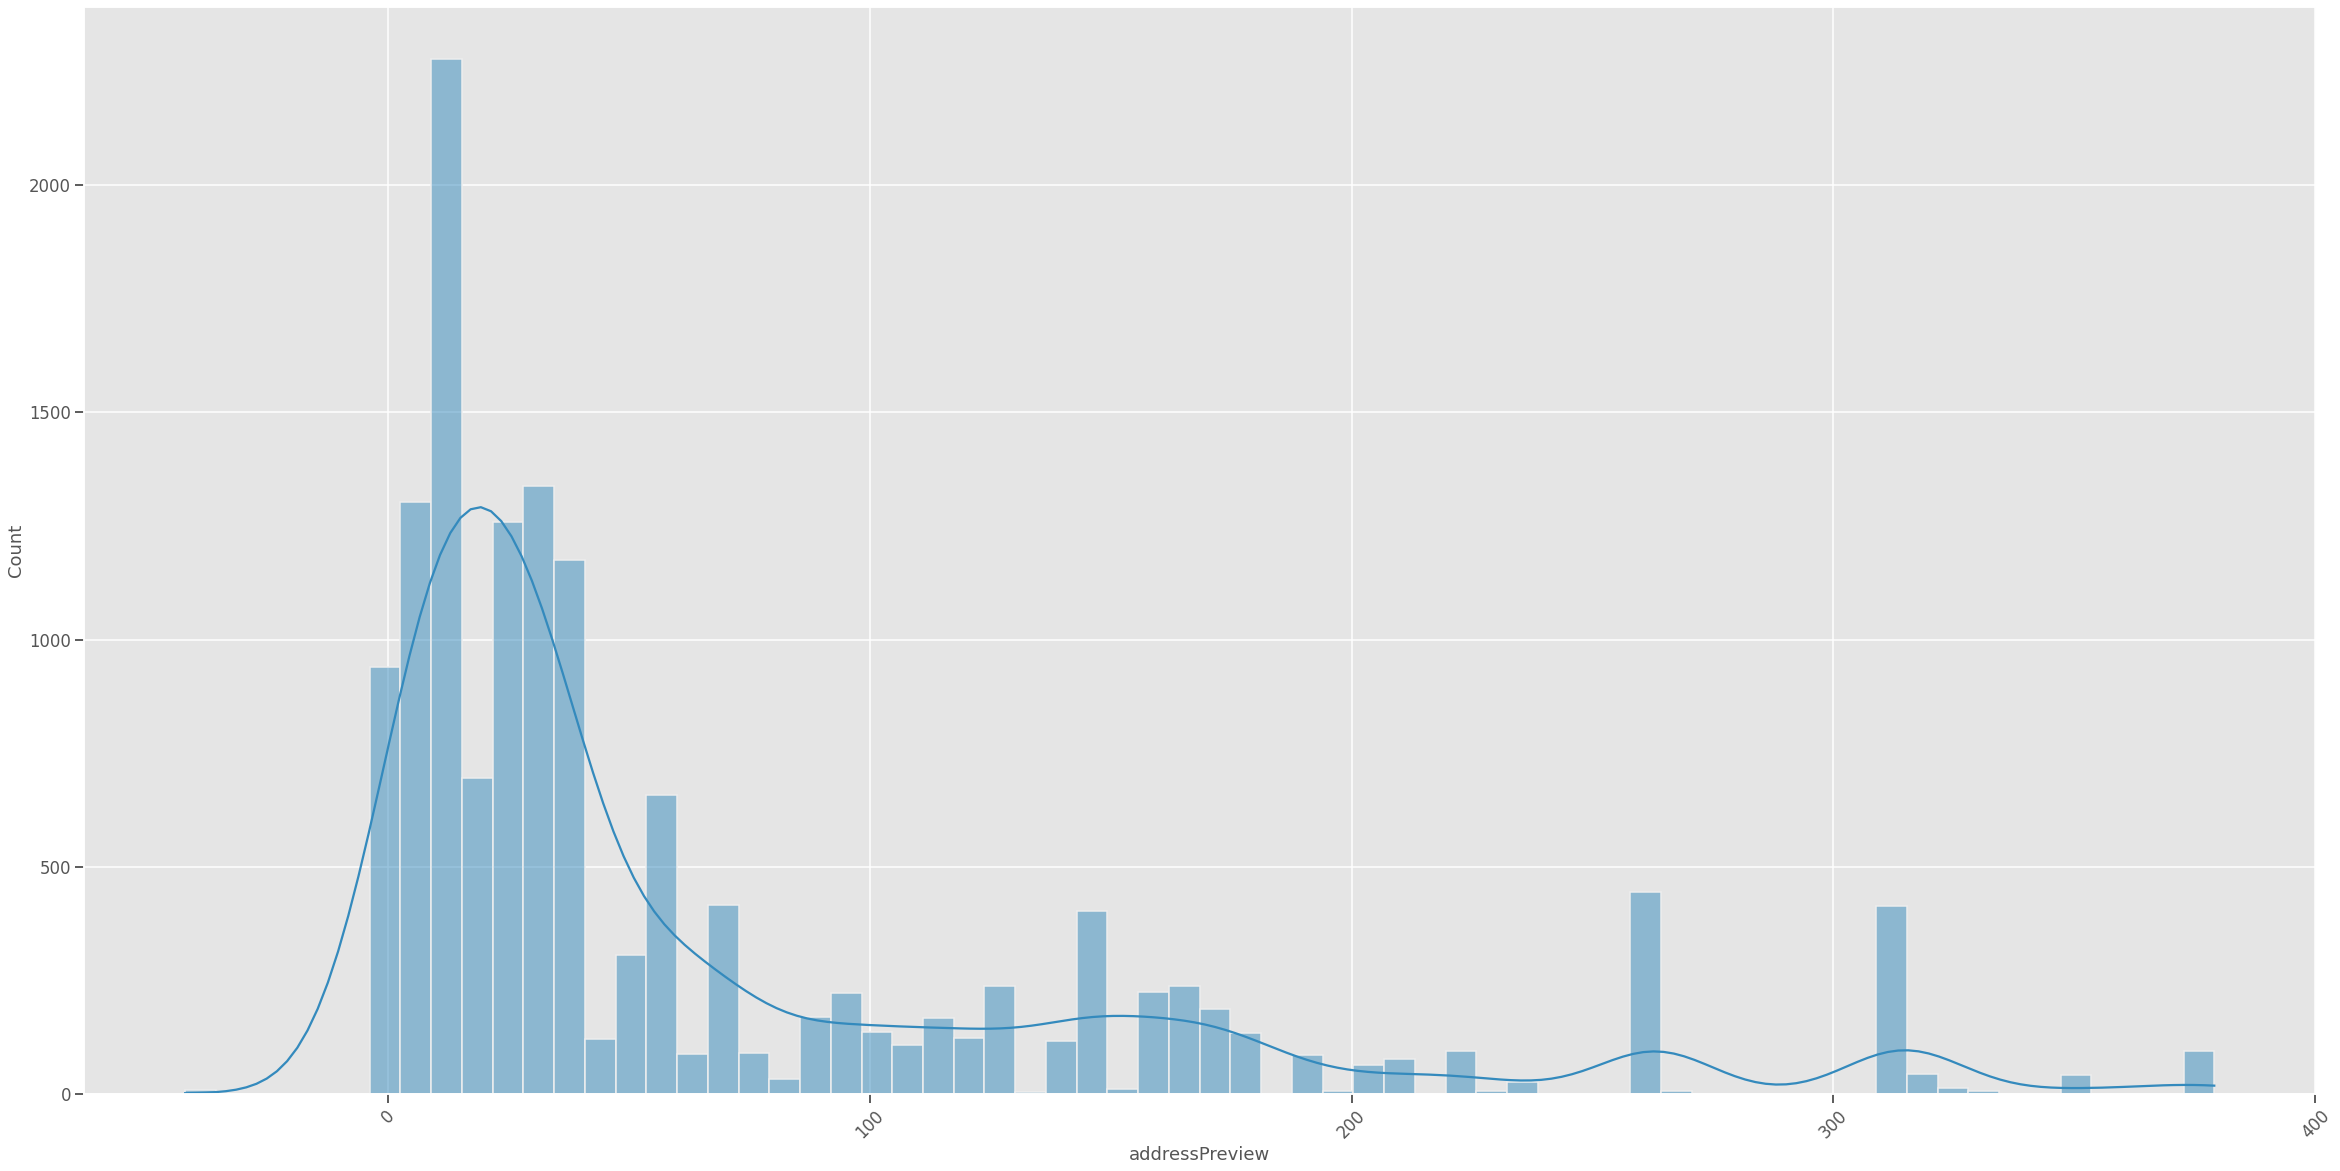

In [ ]:
plt.figure(figsize=(40,20))
plt.xticks(rotation=45)
temp = only_cp.sort_values()
sns.histplot(temp[temp < 400], kde=True) 
# esta el valor 8080 que se repite muchas veces y fue eliminado para ver mejor el plot
# habia un par de variables mayores a 400. pero las elimine porque eran pocas y la parte central es las cercanas al 100

Podemos Corroborar que la mayor Zona de influencia según los **CP**, está conprendida entre 0 y 50. Donde se ubican la mayor cantidad de **addressPreview**.

# Conclusión 2: 
En conclusión del analisis realizado anteriormente para conocer el flujo geografico de las búsquedas, se realizaron consultas y agrupaciones detalladas sobre  los datos de **addressPreview**, el cual se obtuvo el CP correspondiente a cada local. Nos encontramos con que varios locales no tenian detallado su Cp, por lo cual  se debió realizar una exploración para sacar los datos relevantes, ya que algunos no detallaban el dato correspondiente o en su lugar informaban el local, lo cual no representa un dato de interés para este análisis. 
 Corroboramos que la mayoría de las búsquedas se centraban entre los **CP** de 0 a 50, lo cual nos afirma que las mismas se centran en esas numeraciones representando una Zona de total importancia. 
 De los datos correspondiente a la **LocationZip**, llegamos a la inferencia de que la mayoría de las búsquedas se concentran entre las locaciones de mayor posicionamiento. 
 El cual, podemos corroborar que existe bastante relevancia entre los datos de **Position** y los de **Keywords**,  ya que representan un  gran porcentaje en las búsquedas.  Referenciando, que el dato de position y LocationZip, tienen un importante papel al momento de realizar una búsqueda de una Keyword de interés. 

## Actividad 3
#### Objetivo
Vamos a analizar las relaciones entre tres variables numéricas: cantidad de reseñas, calificación de esas reseñas y posicionamiento de las tiendas

In [ ]:
#Selecciono las variables relevantes 
relevant_columns = ["reviews", "stars", "position"]
df_3 = df[relevant_columns]
df_3[:5]

<IPython.core.display.Javascript object>

,reviews,stars,position
0,10.0,4.6,4
1,10.0,4.6,4
2,10.0,4.6,3
3,10.0,4.6,4
4,10.0,4.6,2


In [ ]:
#exploro estas variables, sobre todo para ver si hay outlers en reviews
df_3.describe()

<IPython.core.display.Javascript object>

,reviews,stars,position
count,71172.000000,71172.000000,73005.000000
mean,372.209099,4.175780,9.449257
std,1132.339900,0.483462,5.950160
min,1.000000,1.000000,1.000000
25%,62.000000,3.900000,4.000000
50%,170.000000,4.200000,9.000000
75%,369.000000,4.500000,15.000000
max,77817.000000,5.000000,20.000000


<IPython.core.display.Javascript object>

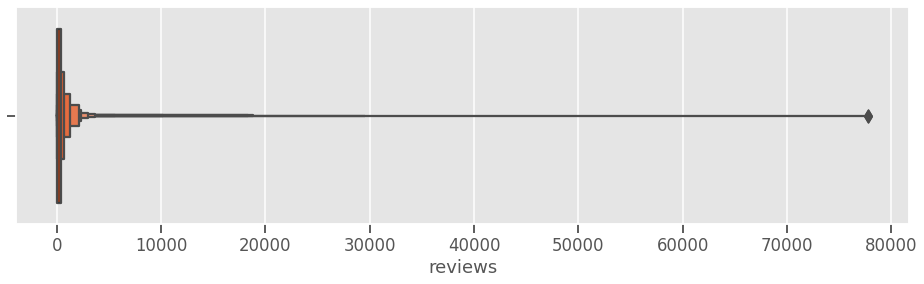

In [ ]:
#vemos los outliers de cantidad de reviews
plt.figure(figsize=(16, 4))
sns.boxenplot(data=df_3, x=df_3.reviews, 
                color='orangered')

In [ ]:
#Efectivamente, hay un outlier que distorsiona toda la distribución. Puse un límite arbitrario para quitar los muy estremos, pero analizaremos outliers en la sección siguiente. 
#De este modo, puedo graficar bien las correlaciones sin perder datos de la tiendas más evaluadas.
max_limit = 6000
print(max_limit)
df_3c = df_3[(df_3["reviews"]<=max_limit)]
df_3c.describe()

<IPython.core.display.Javascript object>

6000


,reviews,stars,position
count,71044.000000,71044.000000,71044.00000
mean,342.687940,4.175507,9.43832
std,534.559585,0.483822,5.94696
min,1.000000,1.000000,1.00000
25%,62.000000,3.900000,4.00000
50%,170.000000,4.200000,9.00000
75%,367.000000,4.500000,15.00000
max,5986.000000,5.000000,20.00000


### 3.1
**¿Hay relación entre cantidad y calificación de las reseñas? De existir, ¿cómo es esa relación?**

<IPython.core.display.Javascript object>

,stars,reviews
stars,1.000000,0.057688
reviews,0.057688,1.000000


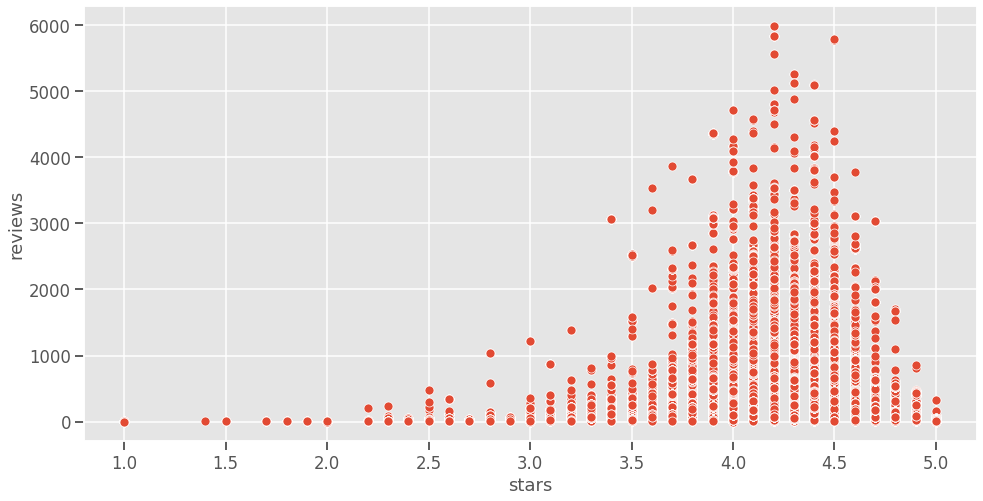

In [ ]:
fig = plt.figure(figsize=(16,8))
sns.scatterplot(x="stars", y="reviews", data=df_3c)

relevant_columns = ['stars', 'reviews']
df_review = df_3c[relevant_columns]
df_review.corr(method ='pearson')

###La correlación entre ambas variables es baja (0.057)

### 3.2

Para responder al ejercicio b, estimaremos en primer lugar la **correlación entre cantidad de reseñas y posición** y entre **calificación de reseñas y posición**.

<IPython.core.display.Javascript object>

,reviews,position
reviews,1.000000,0.036041
position,0.036041,1.000000


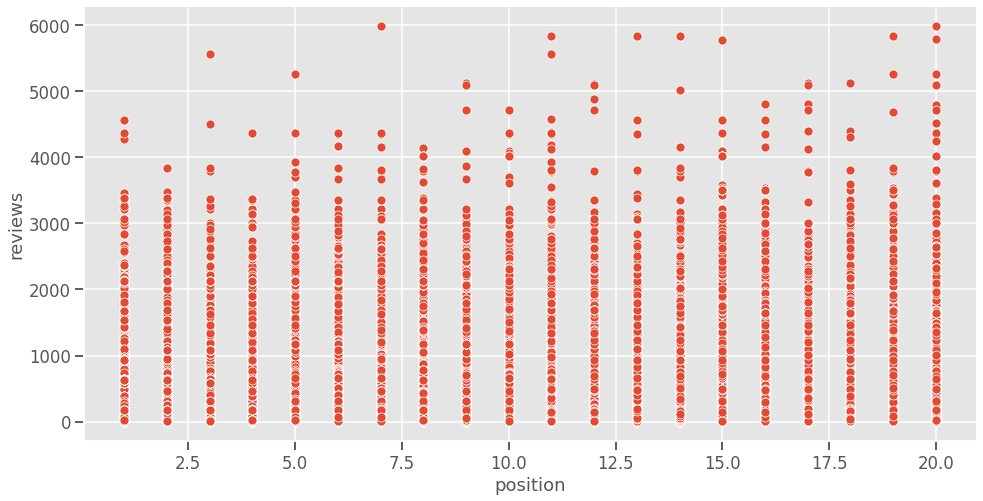

In [ ]:
#correlación entre calificación de reseñas y posición
fig = plt.figure(figsize=(16,8))
sns.scatterplot(x="position", y="reviews", data=df_3c)

relevant_columns = ['reviews', 'position']
df_position_a = df_3c[relevant_columns]
df_position_a.corr(method ='pearson')

<IPython.core.display.Javascript object>

,stars,position
stars,1.00000,-0.09258
position,-0.09258,1.00000


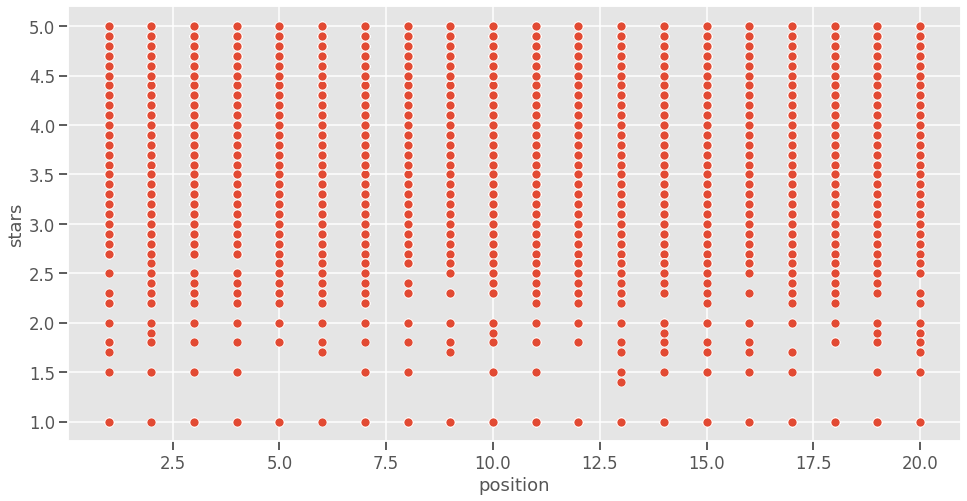

In [ ]:
#correlación entre calificación de reseñas y posición
fig = plt.figure(figsize=(16,8))
sns.scatterplot(x="position", y="stars", data=df_3c)

relevant_columns = ['stars', 'position']
df_position_b = df_3c[relevant_columns]
df_position_b.corr(method ='pearson')

**No se encuentra correlación entre la posición de una tienda y la cantidad de revisiones (0.036) y calificación de las reseñas (-0.092)**.

Ahora evaluaremos a las 3 variables de forma conjunta. Para ello, convertiremos a la variable calificación en un variable categórica de 1 a 5 estrellas y la utilizaremos como tercera variable en un scatterplot 

In [ ]:
bins = [1, 1.5, 2.5, 3.5, 4.5, 5]
names=[1, 2, 3, 4, 5]
df["stars"] = pd.cut(df["stars"], bins, labels = names)
df[:3]

<IPython.core.display.Javascript object>

,accountId,accountName,locationId,locationName,uid,directory,keyword,processDate,locationZip,locationCity,locationCountry,locationState,device,language,status,attempts,linkUrl,title,position,page,type,addressPreview,telephonePreview,category,stars,reviews,description,snippet,price
0,NaN,NaN,NaN,NaN,dataDate:2020-09-24T16:26:13.003Z_directory:GO...,GOOGLE_LOCAL_ES,empanadas take away,2020-09-24 16:26:13.003 UTC,29001,NaN,ES,NaN,MOBILE,es,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,El Club - Auténticas Empanadas Argentinas,4,1,LOCAL_LINK,"Av de Europa, 91",NaN,Restaurante de comida para llevar,5,10.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,dataDate:2020-09-24T16:22:50.597Z_directory:GO...,GOOGLE_LOCAL_ES,empanadas take away,2020-09-24 16:22:50.597 UTC,29001,NaN,ES,NaN,MOBILE,es,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,El Club - Auténticas Empanadas Argentinas,4,1,LOCAL_LINK,"Av de Europa, 91",NaN,Restaurante de comida para llevar,5,10.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,dataDate:2020-09-24T16:15:57.893Z_directory:GO...,GOOGLE_LOCAL_ES,empanadas take away,2020-09-24 16:15:57.893 UTC,29001,NaN,ES,NaN,MOBILE,es,SUCCEED,1,https://www.google.es/search?safe=off&sa=X&hl=...,El Club - Auténticas Empanadas Argentinas,3,1,LOCAL_LINK,"Av de Europa, 91",NaN,Restaurante de comida para llevar,5,10.0,NaN,NaN,NaN


In [ ]:
#Selecciono las variables relevantes 
relevant_columns = ["reviews", "stars", "position"]
df_3b = df[relevant_columns]
df_3b[:5]

<IPython.core.display.Javascript object>

,reviews,stars,position
0,10.0,5,4
1,10.0,5,4
2,10.0,5,3
3,10.0,5,4
4,10.0,5,2


In [ ]:
max_limit = 6000
print(max_limit)
df_3b = df_3b[(df_3["reviews"]<=max_limit)]
df_3b[:3]

<IPython.core.display.Javascript object>

6000


,reviews,stars,position
0,10.0,5,4
1,10.0,5,4
2,10.0,5,3


<IPython.core.display.Javascript object>

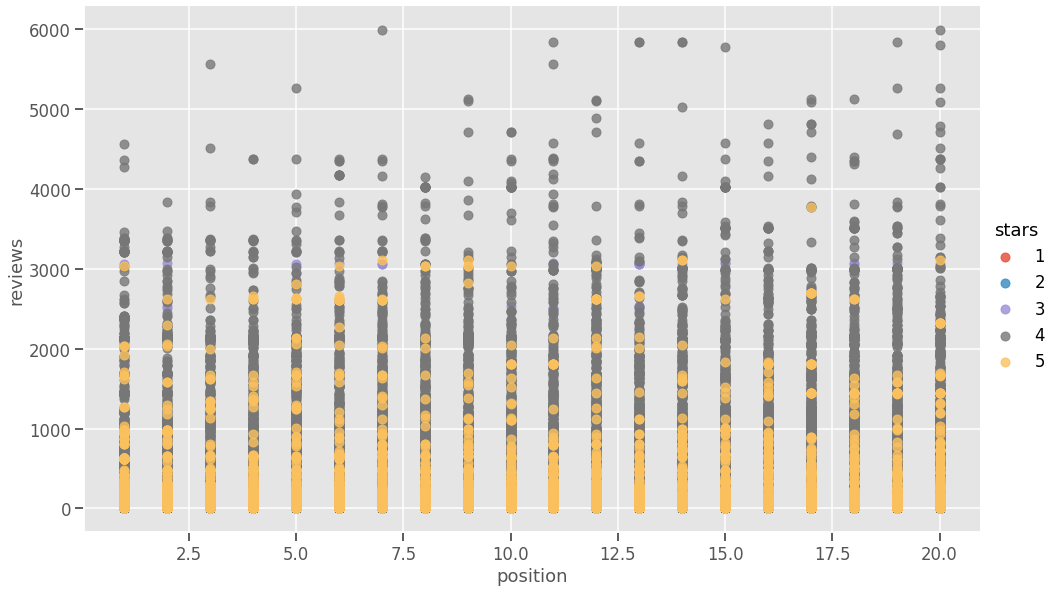

In [ ]:
sns.lmplot(x="position", y="reviews", data=df_3b, fit_reg=False, hue='stars', legend=True, height=8.27, aspect=13.7/8.27)
sns.despine()

Si bien las variables no tienen una relación, este gráfico nos permite decir algo más sobre los datos. **La mayoría de las tiendas tienen entre 4 o 5 estrellas**. A la vez, es **más probable alcanzar las cinco estrellas con menos reviews que con más**.

### 3.3
**En los casos en que se cuente con el contenidode la reseña, ¿Como es la relación de la posición del anuncio con las palabras utilizadas en la reseña?**

###Esta consigna no puede hacerse porque no está disponible el contenido de la reseña

##ESTADÍSTICA DESCRIPTIVA

### a. Calcular medidas de tendencia central y dispersión para variables numéricas y graficar. Ver distribución.

In [ ]:
df = pd.read_csv("./diplo.csv")
df.shape

<IPython.core.display.Javascript object>

(73005, 29)

In [ ]:
#vamos a ver cuáles son las variables numéricas que tenemos. 
#zip no tiene sentido porque no es ténicamente numérica. Attemps y page son constantes y description y snippet son nulas
#nos quedamos con las que veníamos trabajando: position, stars y reviews. 
#en el ejercicio se pide la moda, que la podríamos aplicar a variables cualitativas, 
#pero solo se pide las cuantitativas, así que vamos con estas
df.describe()

<IPython.core.display.Javascript object>

,locationZip,attempts,position,page,stars,reviews,description,snippet
count,73005.000000,73005.0,73005.000000,73005.0,71172.000000,71172.000000,0.0,0.0
mean,14654.390247,1.0,9.449257,1.0,4.175780,372.209099,NaN,NaN
std,9398.702637,0.0,5.950160,0.0,0.483462,1132.339900,NaN,NaN
min,8001.000000,1.0,1.000000,1.0,1.000000,1.000000,NaN,NaN
25%,8014.000000,1.0,4.000000,1.0,3.900000,62.000000,NaN,NaN
50%,8034.000000,1.0,9.000000,1.0,4.200000,170.000000,NaN,NaN
75%,28010.000000,1.0,15.000000,1.0,4.500000,369.000000,NaN,NaN
max,29001.000000,1.0,20.000000,1.0,5.000000,77817.000000,NaN,NaN


In [ ]:
#Selecciono las variables relevantes 
relevant_columns = ["reviews", "stars", "position"]
df_4 = df[relevant_columns]
df_4.describe()

<IPython.core.display.Javascript object>

,reviews,stars,position
count,71172.000000,71172.000000,73005.000000
mean,372.209099,4.175780,9.449257
std,1132.339900,0.483462,5.950160
min,1.000000,1.000000,1.000000
25%,62.000000,3.900000,4.000000
50%,170.000000,4.200000,9.000000
75%,369.000000,4.500000,15.000000
max,77817.000000,5.000000,20.000000


In [ ]:
#esto habría que ponerlo más bonito, pero básicamente sirve para poner juntas medias y medianas
#vemos que en position y stars no hay casi diferencias, pero sí en reviews. Esto es por los outilers
#que ya nos encontramos en el ejericio anterior (de hecho la desviación estandar en esa variable es altísima)
median= df_4.median()
mean=df_4.mean()
mode=df_4.mode()

print ("Mediana de las variables:", median)
print ("Media de las variables:", mean)
print ("Moda de las variables:", mode)

<IPython.core.display.Javascript object>

Mediana de las variables: reviews     170.0
stars         4.2
position      9.0
dtype: float64
Media de las variables: reviews     372.209099
stars         4.175780
position      9.449257
dtype: float64
Moda de las variables:    reviews  stars  position
0    235.0    4.5         1


<IPython.core.display.Javascript object>

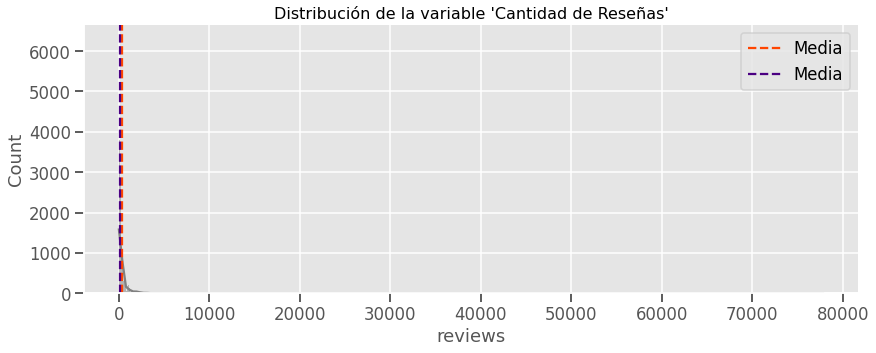

In [ ]:
#Aquí ploteamos la distribución de reviews. Obviamente, no vamos a ver nada por los outliers.
#ahora no vamos a hacer nada porque no es el objetivo, luego veremos cómo queda al eliminar outliers
sns.displot(df_4, x="reviews", color='gray', aspect=2.5, kde=True)
plt.axvline(df_4["reviews"].mean(), color='orangered',
            linestyle='--', label='Media')
plt.axvline(df_4["reviews"].median(), color='indigo',
            linestyle='--', label='Media')
plt.title("Distribución de la variable 'Cantidad de Reseñas'", size=16)

plt.legend()
sns.despine()

<IPython.core.display.Javascript object>

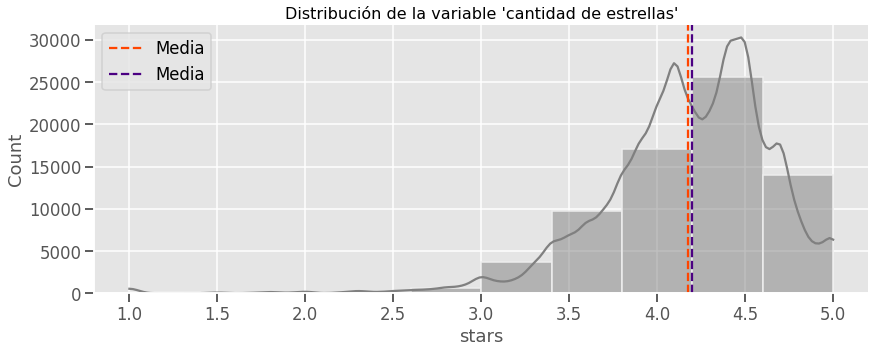

In [ ]:
#distribución de la variable "cantidad de estrellas" 
sns.displot(df_4, x="stars", bins=10, color='gray', aspect=2.5, kde=True)
plt.axvline(df_4["stars"].mean(), color='orangered',
            linestyle='--', label='Media')
plt.axvline(df_4["stars"].median(), color='indigo',
            linestyle='--', label='Media')
plt.title("Distribución de la variable 'cantidad de estrellas'", size=16)

plt.legend()
sns.despine()

<IPython.core.display.Javascript object>

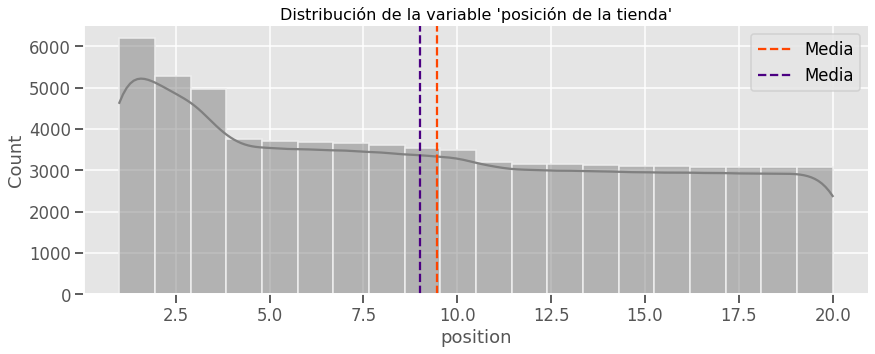

In [ ]:
#distribución de la variable posición
sns.displot(df_4, x="position", bins=20, color='gray', aspect=2.5, kde=True)
plt.axvline(df_4["position"].mean(), color='orangered',
            linestyle='--', label='Media')
plt.axvline(df_4["position"].median(), color='indigo',
            linestyle='--', label='Media')
plt.title("Distribución de la variable 'posición de la tienda'", size=16)

plt.legend()
sns.despine()

Resolución:
chequeemos esto
La primera distribución **(cantidad de reviews)** es imposible de evaluar antes de quitar los casos atípicos, **volveremos a ella luego**. Con respecto a las **evaluaciones de la tienda en cantidad de estrellas**, dependiendo de cómo decidamos graficar el ancho de las barras (bins) tendremos percepciones distintas. Cuando limitamos la cantidad de bins vemos una **distribución con una asimetría negativa**, pero en realidad no parece responder a ninguna distribución conocida. La distribución de la **posición de la tienda tiende a parecerse a una distribución uniforme**. Esto último tiene mucho sentido, dado que se espera que -en el dataset- se estén mostrando los **primeros 20 resultados para cada búsqueda**. Sin embargo, es posible que no todos los registros estén completos

### b. Realizar un análisis de outliers

<IPython.core.display.Javascript object>

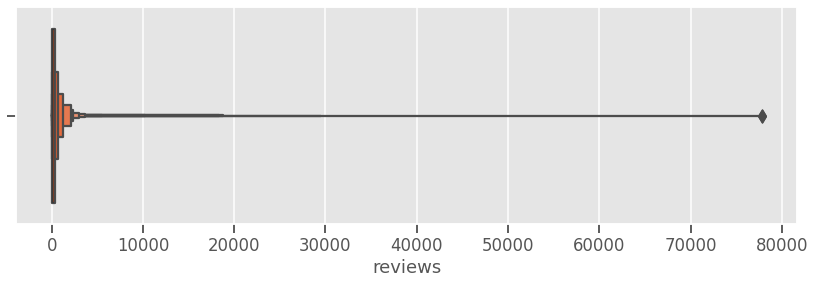

In [ ]:
#por nuestros análisis previos ya sabemos que la única que tiene outliers es la variable: "reviews". Chequeamos igual las distribuciones
plt.figure(figsize=(14, 4))
sns.boxenplot(data=df_4, x="reviews", 
                color='orangered')

<IPython.core.display.Javascript object>

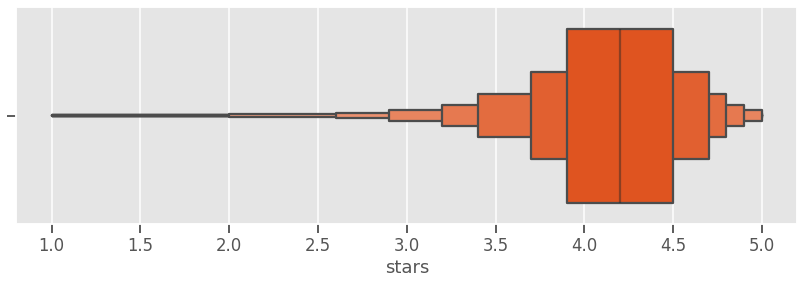

In [ ]:
plt.figure(figsize=(14, 4))
sns.boxenplot(data=df_4, x="stars", 
                color='orangered')

<IPython.core.display.Javascript object>

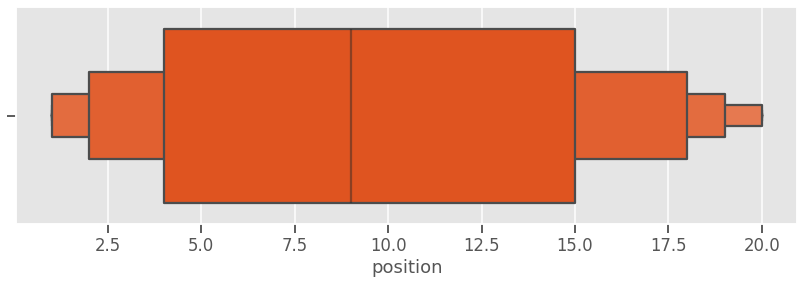

In [ ]:
plt.figure(figsize=(14, 4))
sns.boxenplot(data=df_4, x="position", 
                color='orangered')

De acuerdo a los gráficos, **solo la variable "review" tiene casos atípicos**.

Existen distintos criterios para considerar atípico a un caso y también distintos criterios para decir cuándo eliminarlos.

El método que suele usar boxplot para calcularlos es considerar **atípico leve a un valor que está 1.5 veces el rango intercuartílico (q1 y q3) por encima o por debajo de uno de los quartiles** y atípico extremo el que está 3 veces por encima o debajo. 

También se pueden considerar atípicos los que están **3 desviaciones estándar por encima o por debajo de la media**. 


In [ ]:
#Método del rango intercuartílico
#yo acá elegí la opción conservadora, de 3 veces el rango intercuartílico, porque en realidad no podemos asumir que nuestros casos
#atípicos sean un error.Quizás son tiendas que tienen realmente muchas revisiones.  
q1 = df_4.reviews.quantile(.25)
q3= df_4.reviews.quantile(.75)
iqr = q3 - q1
lower_bound = q1 -(3 * iqr) 
upper_bound = q3 +(3 * iqr) 

print ("el límite inferior es", lower_bound)
print ("el límite superior es", upper_bound)

<IPython.core.display.Javascript object>

el límite inferior es -859.0
el límite superior es 1290.0


In [ ]:
#método de la desviación estándar

sd= np.std(df_4.reviews)
mean=df_4.reviews.mean()

lower_bound= mean - (3 *sd)
upper_bound= mean + (3 *sd)

print ("el límite inferior es", lower_bound)
print ("el límite superior es", upper_bound)

<IPython.core.display.Javascript object>

el límite inferior es -3024.7867370104136
el límite superior es 3769.204935178232


Como vemos, los dos métodos nos dan resultados diferentes. Para este caso, voy a elegir la opción más conservadora. Por supuesto, no tenemos casos bajo el límite inferior (no podrían ser negativos), así que solo quitaremos aquellos que están sobre el límite superior de 3769

In [ ]:
max_limit = 3769
df_4_curado = df_4[(df_4["reviews"]<=max_limit)]
df_4_curado.describe()

<IPython.core.display.Javascript object>

,reviews,stars,position
count,70896.000000,70896.000000,70896.000000
mean,334.266969,4.175458,9.432916
std,501.624466,0.484237,5.947397
min,1.000000,1.000000,1.000000
25%,62.000000,3.900000,4.000000
50%,169.000000,4.200000,9.000000
75%,363.000000,4.500000,15.000000
max,3706.000000,5.000000,20.000000


<IPython.core.display.Javascript object>

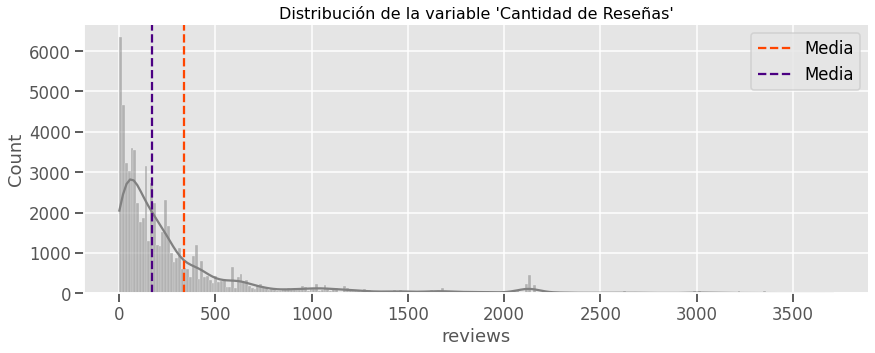

In [ ]:
#Ahora grafico la distribución sin outliers
sns.displot(df_4_curado, x="reviews", color='gray', aspect=2.5, kde=True)
plt.axvline(df_4_curado["reviews"].mean(), color='orangered',
            linestyle='--', label='Media')
plt.axvline(df_4_curado["reviews"].median(), color='indigo',
            linestyle='--', label='Media')
plt.title("Distribución de la variable 'Cantidad de Reseñas'", size=16)

plt.legend()
sns.despine()

Si bien la distribución mejora, tiene aún una larga cola que genera una gran dispersión. 

Podemos probar **qué pasaría con el otro método para detección de outliers**

<IPython.core.display.Javascript object>

NameError: ignored

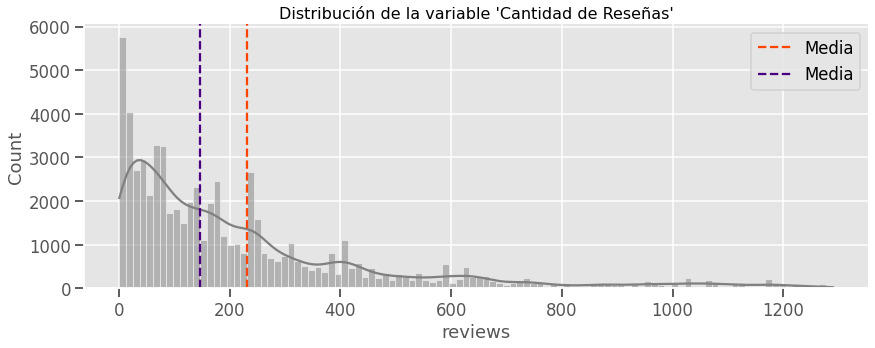

In [ ]:
max_limit = 1290
df_4_curado2 = df_4[(df_4["reviews"]<=max_limit)]
df_4_curado2.describe()

sns.displot(df_4_curado2, x="reviews", color='gray', aspect=2.5, kde=True)
plt.axvline(df_4_curado2["reviews"].mean(), color='orangered',
            linestyle='--', label='Media')
plt.axvline(df_4_curado2["reviews"].median(), color='indigo',
            linestyle='--', label='Media')
plt.title("Distribución de la variable 'Cantidad de Reseñas'", size=16)

plt.legend()
snsb.despine()

La visualización de la distribución mejora un poco. Sin embargo, aun **no tiene una forma similar a una distribución conocida**

### c. Analizar e explicar variación de las variables cuantitativas desglosado por una variable cualitativa

Vamos a visualizar las variables cuantitativas en función del tipo de salida: links orgánicos y links pagos. El tamaño del segundo grupo es muchísimo menor (n=1262, contra n=71743), por lo tanto vamos a usar la densidiad no condicional, para que la calcule independientemente para cada grupo. Observamos sus distribuciones, pero no comparamos sus tamaños porque no es el objetivo aquí

In [ ]:
max_limit = 1290
df_4c = df[(df["reviews"]<=max_limit)]

In [ ]:
sns.set(style="darkgrid")

plt.figure(figsize=(14, 4))
sns.kdeplot(data=df_4c, x="reviews", hue="type", common_norm=False, shade=True)
sns.despine()

In [ ]:
sns.set(style="darkgrid")

plt.figure(figsize=(14, 4))
sns.kdeplot(data=df_4c, x="stars", hue="type", common_norm=False, shade=True)
sns.despine()

In [ ]:
sns.set(style="darkgrid")

plt.figure(figsize=(14, 4))
sns.kdeplot(data=df_4c, x="position", hue="type", common_norm=False, shade=True)
sns.despine()b

Es interesante ver algunos cambios en las métricas cuando se trata de anuncios pagos. En particular, **los picos que se observan respecto de la posición en que aparecen los link pagos**, que evidencia que efectivamente son los que primero se muestran a los usuarios. Esto es esperable. Pero, **si bien los links pagos pueden tener más revisiones que los no pagos**, vemos que esto **no necesariamente implica una mejor calificación**. De hecho, los links no pagos acumulan comparativamente más observaciones en el extremo más alto de calificación. 

### d. Probabilidades Marginales y conjuntas

In [ ]:
#tabla de contingencia con porcentajes calculados por filas. Para nuestro "problema" nos interesa esto. Ves qué porcentaje de los anuncios pagos aparecen en los primeros puestos
#que son básicamente todos. 
pd.crosstab(index=df['position'],
            columns=df['type']).apply(lambda r: r/r.sum() *100,
                                axis=0)

In [ ]:
#acá están los porcentajes, entiendo que son probabilidades conjuntas. Esto muestra que, aunque todos los links pagos aparecen al inicio, como usuario es poco probable que tu resultado sea un anuncio.
pd.crosstab(index=df['position'],
            columns=df['type'], normalize=True, margins=True)*100

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.countplot(df.position,  hue=df.type)
plt.xticks(rotation=45)
sns.despine()

# Conclusión

A partir del análisis de los datos, encontramos que los resultados de posición tienen sentido en la medida que se asocien a una tienda, pero no por sí mismos. Es decir, dado que para la mayoría de las búsquedas se presentan los primeros 20 resultados, la distribución de la variable posición tienden a ser uniforme. Además, es relevante notar que -contrario a lo peserado- no hay una relación entre la posición y la cantidad de reviews y la cantidad de estrellas. Tampoco hay relación entre la cantidad de reviews y las estrellas. Sin embargo, es más probable alcanzar una calificación de 5 estrellas con menos revisiones antes que con más. Finalmente, la enorme mayoría de los resultados corresponden a links orgánicos, mientras que los pagos son una minoría. Sin embargo, pagar un anuncio efectivamente garantiza aparecer en el primer o segundo lugar. De cualquier modo, esto no necesariamente se corresponde con más revisiones y, especialmente, no se corresponde con mejores revisiones. 


In [ ]:
# con este comando descargar el colab a pdf. 
# Todos los comentarios y todo lo que ven que se ejecuto lo guarda.
# le va a pedir que accedan al link, se logean con la misma cuenta que acceden a este colab
# y les descarga como PDF.
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Mentoria-1.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





^C
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Mentoria-1.ipynb to pdf
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/nbconvert/nbconvertapp.py", line 338, in start
    self.convert_notebooks()
  File "/usr/local/lib/python2.7/dist-packages/nbconvert/nbconvertapp.py", line 508, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python2.7/dist-packages/nbconvert/nbconvertapp.py", line 479, in convert_single_notebook
    output, resources = self

'File Download Unsuccessful. Saved in Google Drive'